# NAUJATKUAT RIVER DATA, 2016-2019

In [4]:
# import the pandas library
import pandas as pd
import numpy as np

# read the file
data = pd.read_csv('CR1000_NuukF_2019-07-12T09-10-2.dat')

data.head()

,TIMESTAMP,RECORD,BattV_Avg,PTemp_C_Avg,DT_Avg,DT_Max,DT_Min,DT_Std,Q_Avg,TCDT_Avg,BattV,BattVoltBank
0,2016-08-03 07:00:00,0,14.25,16.36,6.449,6.449,6.449,0,189,6.639,14.25,-1.482
1,2016-08-03 08:00:00,1,14.24,16.32,6.462,6.462,6.462,0,185,6.652,14.24,-2.757
2,2016-08-03 09:00:00,2,14.27,16.32,6.442,6.442,6.442,0,184,6.632,14.27,-3.862
3,2016-08-03 10:00:00,3,14.24,16.56,6.399,6.399,6.399,0,187,6.59,14.24,-4.866
4,2016-08-03 11:00:00,4,14.24,16.66,6.397,6.397,6.397,0,192,6.589,14.24,-5.666


Print Data Type - it looks like some columns have imported as objects instead of numbers

In [5]:
data.dtypes

TIMESTAMP        object
RECORD            int64
BattV_Avg       float64
PTemp_C_Avg     float64
DT_Avg           object
DT_Max           object
DT_Min           object
DT_Std           object
Q_Avg             int64
TCDT_Avg         object
BattV           float64
BattVoltBank    float64
dtype: object

Renaming Columns

In [6]:
new_column_names = ['OldTIMESTAMP', 'RecordNo', 'BattV', 'TEMP_C', 'Stage_mean', 'Stage_max', 'Stage_min', 'Stage_std', 'Avg_Q','TCDT_Avg','BattV','BattVoltBank']

In [7]:
data.columns = new_column_names
data[['TCDT_Avg']].head()

,TCDT_Avg
0,6.639
1,6.652
2,6.632
3,6.59
4,6.589


For some reason, lots of columns ended up as objects. The next cell forces them all to be numbers.

In [8]:
types_dict = {'TEMP_C': float, 'Stage_mean': float, 'Stage_max': float, 'Stage_min': float, 'Stage_std': float, 'Avg_Q': float,'TCDT_Avg': float,'BattV': float,'BattVoltBank': float}
for col, col_type in types_dict.items():
    data[col] = data[col].astype(col_type)
data.dtypes

OldTIMESTAMP     object
RecordNo          int64
BattV           float64
TEMP_C          float64
Stage_mean      float64
Stage_max       float64
Stage_min       float64
Stage_std       float64
Avg_Q           float64
TCDT_Avg        float64
BattV           float64
BattVoltBank    float64
dtype: object

## Converting to pandas timestamp

In [9]:
data['TIMESTAMP'] = pd.to_datetime(data['OldTIMESTAMP'])
data.head()

,OldTIMESTAMP,RecordNo,BattV,TEMP_C,Stage_mean,Stage_max,Stage_min,Stage_std,Avg_Q,TCDT_Avg,BattV,BattVoltBank,TIMESTAMP
0,2016-08-03 07:00:00,0,14.25,16.36,6.449,6.449,6.449,0.0,189.0,6.639,14.25,-1.482,2016-08-03 07:00:00
1,2016-08-03 08:00:00,1,14.24,16.32,6.462,6.462,6.462,0.0,185.0,6.652,14.24,-2.757,2016-08-03 08:00:00
2,2016-08-03 09:00:00,2,14.27,16.32,6.442,6.442,6.442,0.0,184.0,6.632,14.27,-3.862,2016-08-03 09:00:00
3,2016-08-03 10:00:00,3,14.24,16.56,6.399,6.399,6.399,0.0,187.0,6.590,14.24,-4.866,2016-08-03 10:00:00
4,2016-08-03 11:00:00,4,14.24,16.66,6.397,6.397,6.397,0.0,192.0,6.589,14.24,-5.666,2016-08-03 11:00:00


## Creating a data subset for Timestamp versus TCDT

In [10]:
stage_data = data[['TIMESTAMP', 'TCDT_Avg']].copy()
stage_data.head()

,TIMESTAMP,TCDT_Avg
0,2016-08-03 07:00:00,6.639
1,2016-08-03 08:00:00,6.652
2,2016-08-03 09:00:00,6.632
3,2016-08-03 10:00:00,6.590
4,2016-08-03 11:00:00,6.589


## Creating Stage Plot

0.0 13.04
(25735,)
nan


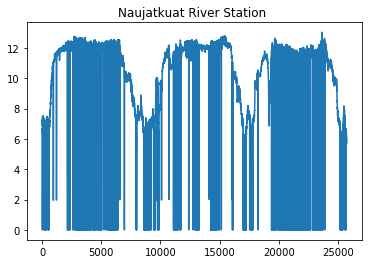

In [11]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
%matplotlib inline

ts = stage_data['TIMESTAMP'].values
tcdt = np.array(stage_data['TCDT_Avg'].values)
print(np.nanmin(tcdt),np.nanmax(tcdt))
print(np.shape(tcdt))
plt.plot(tcdt)
plt.title('Naujatkuat River Station ')
print(np.median(tcdt))

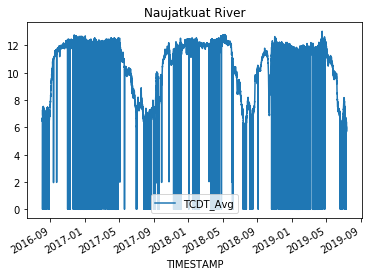

In [12]:
data.plot(x='TIMESTAMP', y='TCDT_Avg', title='Naujatkuat River')

# Need to replace 0 values
You can see from the plot that there are times when the sensor measures 0 for the temperature-corrected distance. Most likely these values are due to a problem? 
We will replace all 0 values by a so-called NaN value. NaN stands for 'Not a Number'. In computing, NaN, is defined as a numeric data type value representing an undefined or unrepresentable value, especially in floating-point arithmetic. This is really handy because for many purposes calculations can then be done without taking into account the newly assigned NaN values. 

### But actually...
In this data set, it looks like the bad values aren't exactly zero...so we are tossing out everything less than 4.


In [13]:
import numpy as np

stage_data.loc[stage_data['TCDT_Avg'] < 4., 'TCDT_Avg'] = np.nan

Text(0.5, 1.0, 'Naujatkuat River Station ')

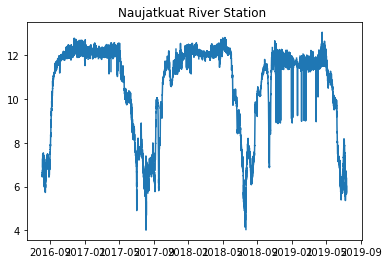

In [14]:
plt.plot(stage_data['TIMESTAMP'], stage_data['TCDT_Avg'])
plt.title('Naujatkuat River Station ')

Smooth the plot using the average - this plot averages every 19 hours, not every day

Text(0.5, 1.0, 'Naujatkuat River Station ')

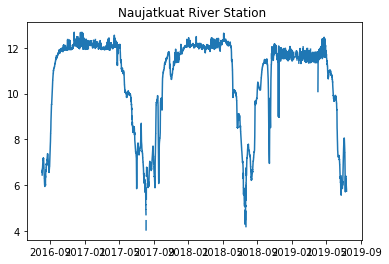

In [15]:
from scipy import signal

stage_data['TCDT_Avg_Smooth']=signal.medfilt(stage_data['TCDT_Avg'],19)

plt.plot(stage_data['TIMESTAMP'], stage_data['TCDT_Avg_Smooth'])
plt.title('Naujatkuat River Station ')

# Select individual years by interrogating the TIMESTAMP attribute


In [16]:
stage_data['year'] = pd.DatetimeIndex(stage_data['TIMESTAMP']).year
stage_data.head()

,TIMESTAMP,TCDT_Avg,TCDT_Avg_Smooth,year
0,2016-08-03 07:00:00,6.639,6.440,2016
1,2016-08-03 08:00:00,6.652,6.479,2016
2,2016-08-03 09:00:00,6.632,6.488,2016
3,2016-08-03 10:00:00,6.590,6.547,2016
4,2016-08-03 11:00:00,6.589,6.580,2016


In [17]:
# To get all years plotted on one x-axis. Need to convert the actual date to 'Day of Year - DOY'

stage_data['DOY'] = stage_data['TIMESTAMP'].dt.dayofyear
stage_data.head()

,TIMESTAMP,TCDT_Avg,TCDT_Avg_Smooth,year,DOY
0,2016-08-03 07:00:00,6.639,6.440,2016,216
1,2016-08-03 08:00:00,6.652,6.479,2016,216
2,2016-08-03 09:00:00,6.632,6.488,2016,216
3,2016-08-03 10:00:00,6.590,6.547,2016,216
4,2016-08-03 11:00:00,6.589,6.580,2016,216


In [18]:
#subset by year

stage_data_2016=stage_data[stage_data.year ==2016]
stage_data_2017=stage_data[stage_data.year ==2017]
stage_data_2018=stage_data[stage_data.year ==2018]
stage_data_2019=stage_data[stage_data.year ==2019]

In [19]:
#begin subsetting for may 1 - oct 15
#2016 is a leap year, so the DOY is different

mask2016=(stage_data['DOY'] >= 122)&(stage_data['DOY'] <= 289)
maskother=(stage_data['DOY'] >= 121)&(stage_data['DOY'] <= 288)

sd_summer_2016=stage_data_2016.loc[mask2016]
sd_summer_2017=stage_data_2017.loc[maskother]
sd_summer_2018=stage_data_2018.loc[maskother]
sd_summer_2019=stage_data_2019.loc[maskother]

sd_summer_2017.head()

,TIMESTAMP,TCDT_Avg,TCDT_Avg_Smooth,year,DOY
6483,2017-05-01 00:00:00,12.09,12.07,2017,121
6484,2017-05-01 01:00:00,12.08,12.07,2017,121
6485,2017-05-01 02:00:00,12.08,12.07,2017,121
6486,2017-05-01 03:00:00,12.07,12.07,2017,121
6487,2017-05-01 04:00:00,12.06,12.06,2017,121


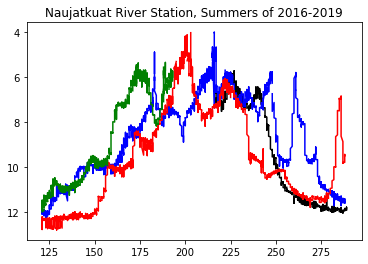

In [20]:
plt.plot(sd_summer_2016['DOY'], sd_summer_2016['TCDT_Avg'], color='black')
plt.plot(sd_summer_2017['DOY'], sd_summer_2017['TCDT_Avg'], color='blue')
plt.plot(sd_summer_2018['DOY'], sd_summer_2018['TCDT_Avg'], color='red')
plt.plot(sd_summer_2019['DOY'], sd_summer_2019['TCDT_Avg'], color='green')

plt.title('Naujatkuat River Station, Summers of 2016-2019')
plt.gca().invert_yaxis()
plt.show()

## Creating Daily Means

In [29]:
#avg2016 = sd_summer_2016.resample('DOY', how='mean')

#avg2016 = sd_summer_2016.resample('DOY').mean()

sd_summer_2016.index = sd_summer_2016['TIMESTAMP']
avg2016 = sd_summer_2016.resample('D').mean()
avg2016


,TCDT_Avg,TCDT_Avg_Smooth,year,DOY
TIMESTAMP,,,,
2016-08-03,6.565455,6.569417,2016,216
2016-08-04,6.854917,6.850692,2016,217
2016-08-05,7.033958,7.006167,2016,218
2016-08-06,7.131417,7.123667,2016,219
2016-08-07,7.183333,7.167333,2016,220
...,...,...,...,...
2016-10-11,11.898750,11.897917,2016,285
2016-10-12,11.932083,11.953333,2016,286
2016-10-13,11.976667,11.967083,2016,287


## The code quits here for now, delete the following cell to make the seasonal yearly graphs

In [ ]:
import sys
sys.exit("Error message")

## Begin Plotting Seasonally
### 2016

In [ ]:
plt.plot(sd_summer_2016['DOY'], sd_summer_2016['TCDT_Avg'])
plt.title('Naujatkuat River Station, 2016')

plt.gca().invert_yaxis()

In [ ]:
#Smooth 2016

sd_summer_2016['TCDT_2016_Smooth']=signal.medfilt(sd_summer_2016['TCDT_Avg'],19)

plt.plot(sd_summer_2016['DOY'], sd_summer_2016['TCDT_2016_Smooth'])
plt.title('Naujatkuat River Station, 2016')

plt.gca().invert_yaxis()

### 2017

In [ ]:
plt.plot(sd_summer_2017['DOY'], sd_summer_2017['TCDT_Avg'])
plt.title('Naujatkuat River Station, 2017')

plt.gca().invert_yaxis()

In [ ]:
#Smooth 2017

sd_summer_2017['TCDT_2017_Smooth']=signal.medfilt(sd_summer_2017['TCDT_Avg'],19)

plt.plot(sd_summer_2017['DOY'], sd_summer_2017['TCDT_2017_Smooth'])
plt.title('Naujatkuat River Station, 2017')

plt.gca().invert_yaxis()

### 2018

In [ ]:
plt.plot(sd_summer_2018['DOY'], sd_summer_2018['TCDT_Avg'])
plt.title('Naujatkuat River Station, 2018')

plt.gca().invert_yaxis()

In [ ]:
#Smooth 2018

sd_summer_2018['TCDT_2018_Smooth']=signal.medfilt(sd_summer_2018['TCDT_Avg'],19)

plt.plot(sd_summer_2018['DOY'], sd_summer_2018['TCDT_2018_Smooth'])
plt.title('Naujatkuat River Station, 2018')

plt.gca().invert_yaxis()

### 2019

In [ ]:
plt.plot(sd_summer_2019['DOY'], sd_summer_2019['TCDT_Avg'])
plt.title('Naujatkuat River Station, 2019')

plt.gca().invert_yaxis()

In [ ]:
#Smooth 2019

sd_summer_2019['TCDT_2019_Smooth']=signal.medfilt(sd_summer_2019['TCDT_Avg'],19)

plt.plot(sd_summer_2019['DOY'], sd_summer_2019['TCDT_2019_Smooth'])
plt.title('Naujatkuat River Station, 2019')

plt.gca().invert_yaxis()